<a href="https://colab.research.google.com/github/AyeshaNoor0231/Pytorch-SimpleNeuralNetwork/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import torch
import torch.nn as nn
from torchsummary import summary

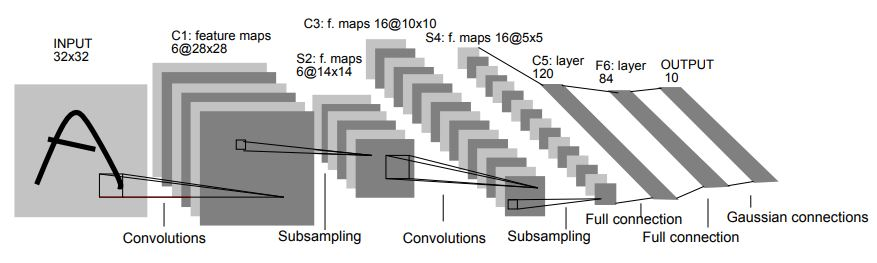

In [ ]:
# Creating class
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # Initializing convolution layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0)

        # Initializing linear layers
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)

        # Initializing Pooling
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

        # Activation Function
        self.tanh = nn.Tanh()

    # Forward Propagation
    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.avg_pool(x)

        x = self.conv2(x)
        x = self.tanh(x)
        x = self.avg_pool(x)

        x = self.conv3(x)
        x = self.tanh(x)

        # Moving toward fcn

        # Before passing values to the FCN, we have to convert them in 1D
        x = x.reshape(x.shape[0], -1)
        print("tensor after reshaping:", x.shape)

        # Passing to FCN
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)

        return x


# Creating a model
model = LeNet()
x = torch.randn(64, 1, 32, 32)
output = model(x)

print(model)
summary(model, (1, 32, 32))
print("output shape", output.shape)


tensor after reshaping: torch.Size([64, 120])
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=10, bias=True)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (tanh): Tanh()
)
tensor after reshaping: torch.Size([2, 120])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0


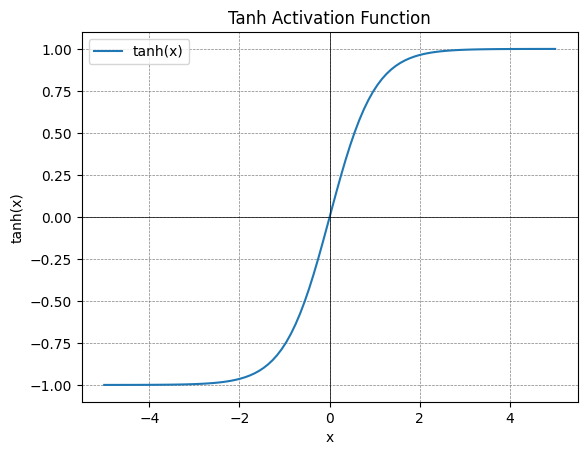

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate tanh values
y_values = tanh(x_values)

# Plot tanh function
plt.plot(x_values, y_values, label='tanh(x)')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


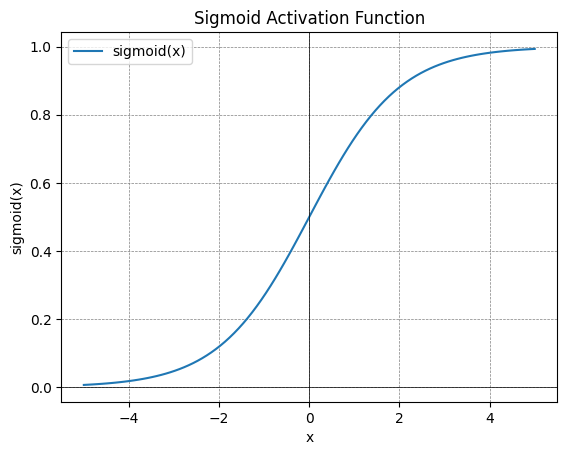

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate sigmoid values
y_values = sigmoid(x_values)

# Plot sigmoid function
plt.plot(x_values, y_values, label='sigmoid(x)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


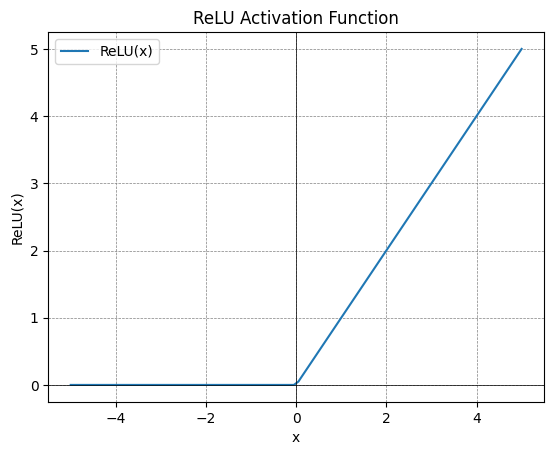

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate ReLU values
y_values = relu(x_values)

# Plot ReLU function
plt.plot(x_values, y_values, label='ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
